In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

import bandit
from bandit.bandit import Bandit, PerArmBandit
from bandit.environment import actions, get_cost, observe
from bandit.policy import Softmax

In [2]:
import numpy as np
from sklearn.feature_extraction import FeatureHasher

N = 500
n_arms = len(actions)
# model = LogisticRegression(random_state=42)
# model = KNeighborsRegressor(3)
model = MLPRegressor(random_state=42)
bandit = Bandit(model, n_arms)
# bandit = PerArmBandit([MLPRegressor(random_state=42) for i in range(n_arms)])
rng = np.random.RandomState(42)

policy = Softmax(tau=0.2, rng=rng)
policy
total_cost = 0
avg_cost = []
for i in range(N):
    if i % 100 == 0:
        print(i)
    state = observe(rng)
    rewards = bandit.pull(state)
    action = policy(rewards)
    reward = get_cost(state, actions[action])
    bandit.update(state, action, reward)
    total_cost += np.maximum(reward, 0)
    avg_cost.append(total_cost / (i + 1))

0
100
200
300
400


In [3]:
total_cost

368.0

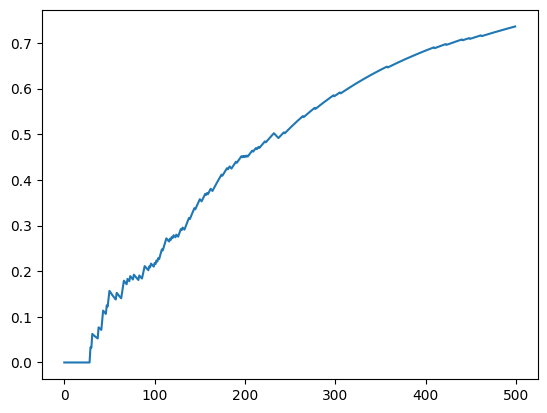

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(N), avg_cost)

In [5]:
state = {"user": "Anna", "time_of_day": "morning"}
rewards = bandit.pull(state)
action = policy(rewards)
reward = get_cost(state, actions[action])
state, actions[action], reward

({'user': 'Anna', 'time_of_day': 'morning'}, 'sports', 1.0)